In [1]:
import pandas as pd
data = pd.read_csv('Churn_Modelling.csv')

Описание датасета
Датасет содержит информацию о клиентах банка, включая демографические данные, финансовые показатели и статус оттока клиентов.

RowNumber: Порядковый номер строки.

CustomerId: Уникальный идентификатор клиента.

Surname: Фамилия клиента.

CreditScore: Кредитный рейтинг клиента.

Geography: Географическое расположение клиента.

Gender: Пол клиента.

Age: Возраст клиента.

Tenure: Срок обслуживания клиента в банке (в годах).

Balance: Баланс на счете клиента.

NumOfProducts: Количество продуктов банка, которыми пользуется клиент.

HasCrCard: Наличие у клиента кредитной карты.

IsActiveMember: Указывает, является ли клиент активным участником банка.

EstimatedSalary: Оценочная заработная плата клиента.

Exited: Указывает, ушел ли клиент (целевая переменная).

In [2]:
del data['RowNumber']

In [3]:
data.head(20)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [5]:
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
data.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [7]:
numeric_data = data.copy()

for column in ['Surname', 'Geography', 'Gender']:
    numeric_data[column] = numeric_data[column].astype('category').cat.codes

In [8]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  int16  
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  int8   
 4   Gender           10000 non-null  int8   
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int16(1), int64(8), int8(2)
memory usage: 820.4 KB


In [9]:
corr_matrix = numeric_data.corr()

In [10]:
print(corr_matrix['Exited'].round(3).sort_values(ascending=False))

Exited             1.000
Age                0.285
Balance            0.119
Geography          0.036
EstimatedSalary    0.012
CustomerId        -0.006
HasCrCard         -0.007
Surname           -0.011
Tenure            -0.014
CreditScore       -0.027
NumOfProducts     -0.048
Gender            -0.107
IsActiveMember    -0.156
Name: Exited, dtype: float64


array([[<AxesSubplot: title={'center': 'CustomerId'}>,
        <AxesSubplot: title={'center': 'Surname'}>,
        <AxesSubplot: title={'center': 'CreditScore'}>,
        <AxesSubplot: title={'center': 'Geography'}>],
       [<AxesSubplot: title={'center': 'Gender'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Tenure'}>,
        <AxesSubplot: title={'center': 'Balance'}>],
       [<AxesSubplot: title={'center': 'NumOfProducts'}>,
        <AxesSubplot: title={'center': 'HasCrCard'}>,
        <AxesSubplot: title={'center': 'IsActiveMember'}>,
        <AxesSubplot: title={'center': 'EstimatedSalary'}>],
       [<AxesSubplot: title={'center': 'Exited'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

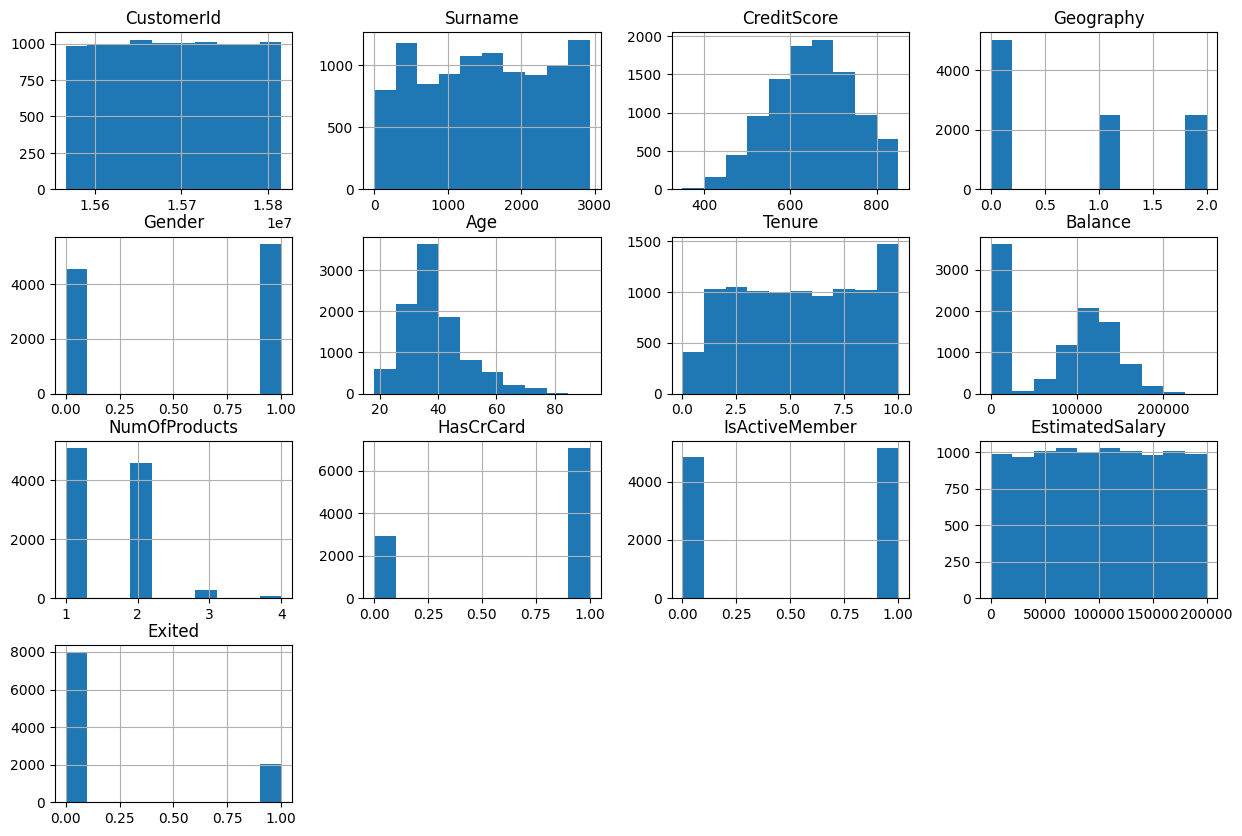

In [11]:
numeric_data.hist(figsize=(15, 10))

array([[<AxesSubplot: title={'center': 'CreditScore'}>,
        <AxesSubplot: title={'center': 'Balance'}>],
       [<AxesSubplot: title={'center': 'NumOfProducts'}>,
        <AxesSubplot: title={'center': 'EstimatedSalary'}>]], dtype=object)

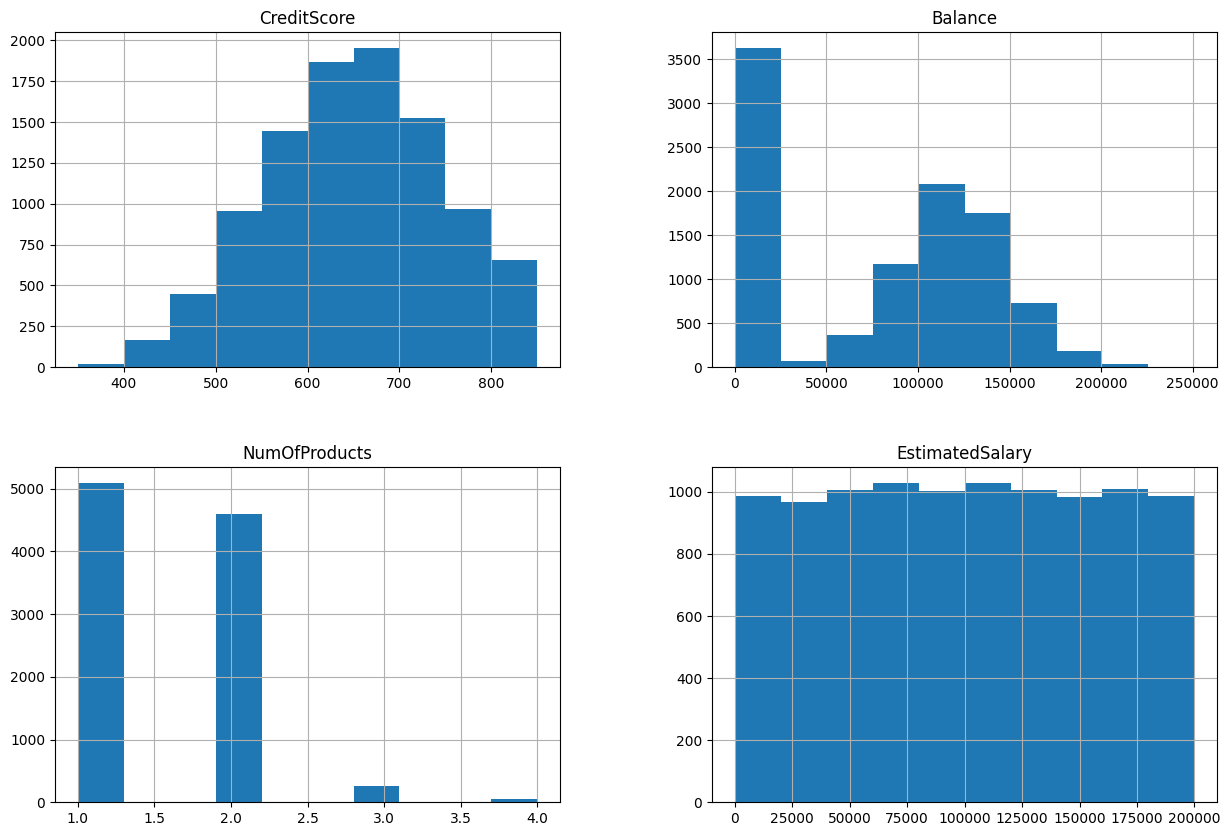

In [12]:
numeric_data[['CreditScore', 'Balance', 'NumOfProducts', 'EstimatedSalary']].hist(figsize=(15, 10))

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
dataset1 = numeric_data.copy()
dataset1.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [16]:
del dataset1['CustomerId']
del dataset1['Surname']

In [17]:
dataset1.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [18]:
points = dataset1['Exited']
values = dataset1.drop(['Exited'], axis = 1)

In [19]:
values.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [20]:
train_values, test_values, train_points, test_points = train_test_split(values, points, test_size = 0.2)

In [21]:
train_points

8714    0
9479    0
2170    0
2850    0
489     0
       ..
5875    0
2470    0
7827    0
8611    0
2764    0
Name: Exited, Length: 8000, dtype: int64

In [22]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(train_values, train_points)

RandomForestClassifier()

In [23]:
y_pred = rf_model.predict(test_values)
y_pred_proba = rf_model.predict_proba(test_values)[:, 1]

accuracy = accuracy_score(test_points, y_pred)
auc_roc = roc_auc_score(test_points, y_pred_proba)
report = classification_report(test_points, y_pred)

print('Accuracy:', accuracy)
print('AUC-ROC:', auc_roc)
print('Classification Report:\n', report)

Accuracy: 0.851
AUC-ROC: 0.8504984182950286
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.73      0.43      0.54       407

    accuracy                           0.85      2000
   macro avg       0.80      0.69      0.73      2000
weighted avg       0.84      0.85      0.84      2000



In [24]:
import matplotlib.pyplot as plt

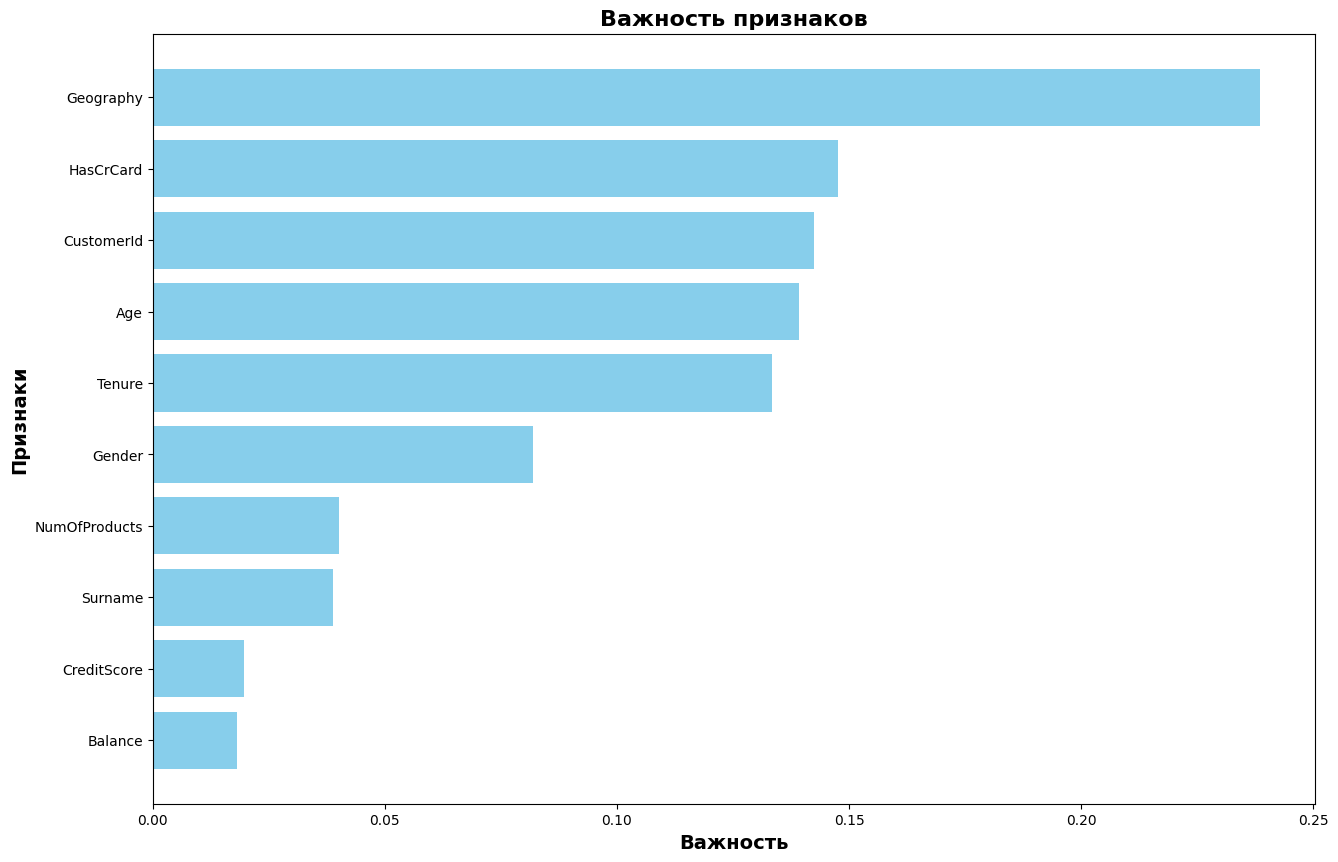

        Features  Gini-Importance
0      Geography         0.238499
1      HasCrCard         0.147531
2     CustomerId         0.142498
3            Age         0.139234
4         Tenure         0.133443
5         Gender         0.081955
6  NumOfProducts         0.040169
7        Surname         0.038820
8    CreditScore         0.019619
9        Balance         0.018233


In [25]:
feats = {}
for feature, importance in zip(data.columns, rf_model.feature_importances_):
    feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})

fig, ax = plt.subplots(figsize=(15, 10))
ax.barh(importances['Features'], importances['Gini-Importance'], color='skyblue')

ax.set_xlabel('Важность', fontsize=14, fontweight='bold')
ax.set_ylabel('Признаки', fontsize=14, fontweight='bold')
ax.set_title('Важность признаков', fontsize=16, fontweight='bold')

plt.gca().invert_yaxis()
plt.show()

print(importances)

Почему Surname?

In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [27]:
scaler = MinMaxScaler()
scaler.fit(train_values)
train_values_scaled = scaler.transform(train_values)
test_values_scaled = scaler.transform(test_values)

rf_model_m = RandomForestClassifier(n_estimators=20)
rf_model_m.fit(train_values_scaled, train_points)

y_pred = rf_model_m.predict(test_values_scaled)
y_pred_proba = rf_model_m.predict_proba(test_values_scaled)[:, 1]

accuracy = accuracy_score(test_points, y_pred)
auc_roc = roc_auc_score(test_points, y_pred_proba)
report = classification_report(test_points, y_pred)

print('Accuracy:', accuracy)
print('AUC-ROC:', auc_roc)
print('Classification Report:\n', report)

Accuracy: 0.8485
AUC-ROC: 0.8297527111086433
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      1593
           1       0.70      0.44      0.54       407

    accuracy                           0.85      2000
   macro avg       0.79      0.70      0.73      2000
weighted avg       0.84      0.85      0.83      2000



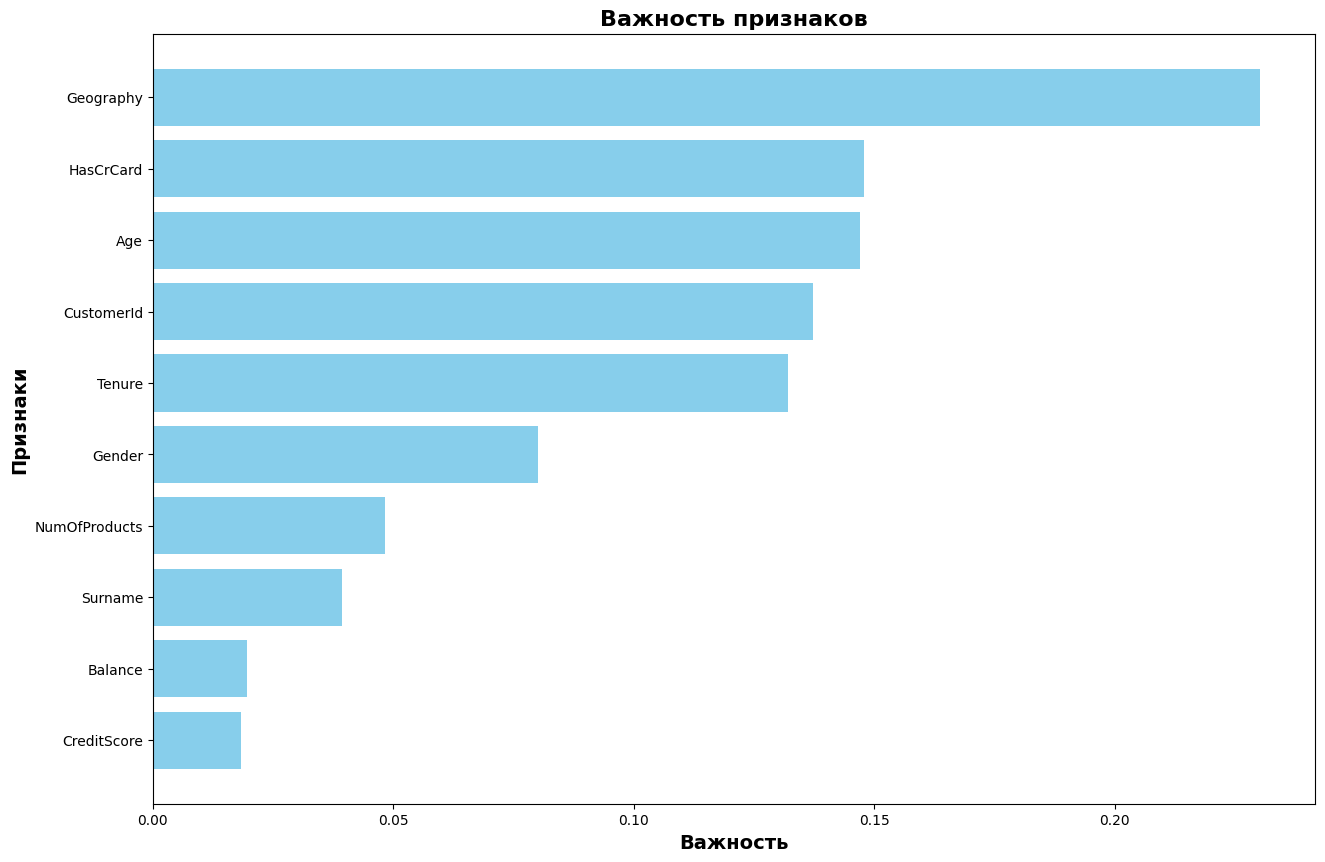

        Features  Gini-Importance
0      Geography         0.230222
1      HasCrCard         0.147807
2            Age         0.147163
3     CustomerId         0.137207
4         Tenure         0.132020
5         Gender         0.080024
6  NumOfProducts         0.048322
7        Surname         0.039282
8        Balance         0.019590
9    CreditScore         0.018363


In [28]:
feats = {}
for feature, importance in zip(data.columns, rf_model_m.feature_importances_):
    feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})

fig, ax = plt.subplots(figsize=(15, 10))
ax.barh(importances['Features'], importances['Gini-Importance'], color='skyblue')

ax.set_xlabel('Важность', fontsize=14, fontweight='bold')
ax.set_ylabel('Признаки', fontsize=14, fontweight='bold')
ax.set_title('Важность признаков', fontsize=16, fontweight='bold')

plt.gca().invert_yaxis()
plt.show()

print(importances)

In [29]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE

In [30]:
smote = SMOTE()

In [39]:
columns = train_values.columns
os_values = pd.DataFrame(data=test_values,columns=columns )
os_points= pd.DataFrame(data=test_points,columns=['Exited'])

rf_model_smote = RandomForestClassifier(n_estimators=100)
rfe = RFE(rf_model)
rfe = rfe.fit(os_values, os_points.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False  True False]
[1 1 2 3 1 4]


In [40]:
print(values.columns.tolist())
significant_features = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Tenure']

['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [41]:
revalues = values[significant_features]
print(revalues.columns.tolist())

['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Tenure']


In [42]:
train_values, test_values, train_points, test_points = train_test_split(revalues, points, test_size=0.2)
print(len(train_values))
train_values_resampled, train_points_resampled = smote.fit_resample(train_values, train_points)
print(len(train_values_resampled))

8000
12764


In [43]:
rf_model_smote.fit(train_values_resampled, train_points_resampled)

RandomForestClassifier()

In [44]:
y_pred = rf_model_smote.predict(test_values)
y_pred_proba = rf_model_smote.predict_proba(test_values)[:, 1]

accuracy = accuracy_score(test_points, y_pred)
auc_roc = roc_auc_score(test_points, y_pred_proba)
report = classification_report(test_points, y_pred)

print('Accuracy:', accuracy)
print('AUC-ROC:', auc_roc)
print('Classification Report:\n', report)

Accuracy: 0.7665
AUC-ROC: 0.7904871240974641
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84      1581
           1       0.46      0.66      0.54       419

    accuracy                           0.77      2000
   macro avg       0.68      0.73      0.69      2000
weighted avg       0.81      0.77      0.78      2000



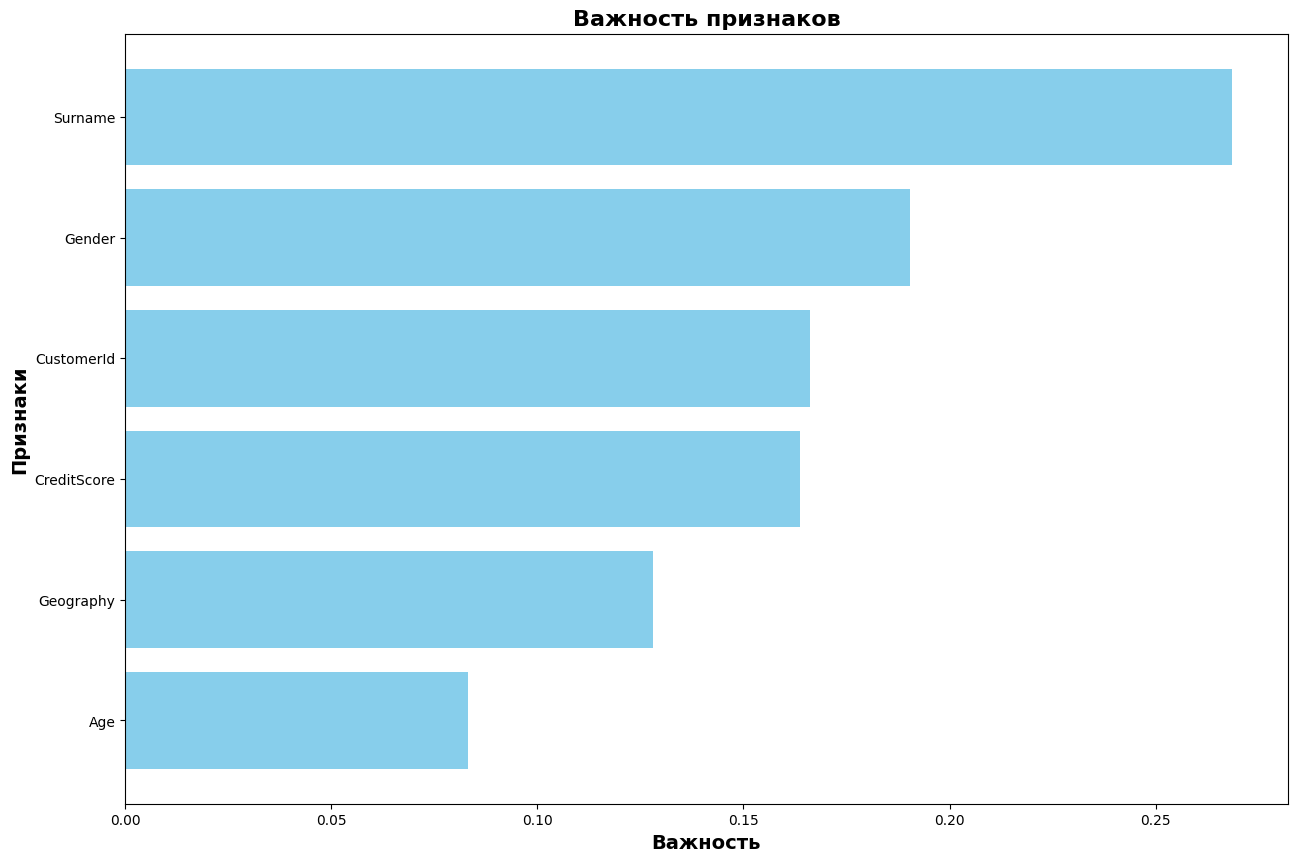

      Features  Gini-Importance
0      Surname         0.268610
1       Gender         0.190298
2   CustomerId         0.166252
3  CreditScore         0.163671
4    Geography         0.128066
5          Age         0.083103


In [46]:
feats = {}
for feature, importance in zip(data.columns, rf_model_smote.feature_importances_):
    feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})

fig, ax = plt.subplots(figsize=(15, 10))
ax.barh(importances['Features'], importances['Gini-Importance'], color='skyblue')

ax.set_xlabel('Важность', fontsize=14, fontweight='bold')
ax.set_ylabel('Признаки', fontsize=14, fontweight='bold')
ax.set_title('Важность признаков', fontsize=16, fontweight='bold')

plt.gca().invert_yaxis()
plt.show()

print(importances)

In [37]:
from joblib import dump

In [48]:
dump(rf_model, 'random_forest.joblib')
dump(rf_model_m, 'random_forest_scaled.joblib')
dump(rf_model_smote, 'random_forest_smote.joblib')

['random_forest_smote.joblib']